In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.float_format', '{:.2f}'.format)

path_2022 = '../data/2022/'
path = '../data/'

In [3]:
svod_234 = pd.read_csv(path_2022+'svod_234.csv', sep=';')
df_info = pd.read_csv(path+'svao_info.csv', sep=';')
df_05_svao = pd.read_csv(path_2022+'svao_5_may.csv', sep=';')
df_06_svao = pd.read_csv(path_2022+'svao_6_june.csv', sep=';')

In [4]:
# расчет суммы, среднего и стандартного отклонения по месяцам
def sum_mean_std_month(df, month):
    tt_mean_std = {}
    
    tt = df['id_tt_cl'].unique()
    for el in tt:
        el_sum = np.round(df[df['id_tt_cl'] == el]['BaseSum_correct'].resample('d').sum().sum(), 2)
        el_mean = np.round(df[df['id_tt_cl'] == el]['BaseSum_correct'].resample('d').sum().mean(), 2)
        el_std = np.round(df[df['id_tt_cl'] == el]['BaseSum_correct'].resample('d').sum().std(), 2)
        tt_mean_std[el] = {f'{month}_sum':el_sum, 
                           f'{month}_mean':el_mean, 
                           f'{month}_std':el_std}
    
    return tt_mean_std

**Май**

In [5]:
df_05_svao['BaseSum_correct'] = df_05_svao['BaseSum'] * df_05_svao['znak']
df_05_svao['Quantity_correct'] = df_05_svao['Quantity'] * df_05_svao['znak']
df_05_svao['date_ch'] = pd.to_datetime(df_05_svao['date_ch'])
df_05_svao = df_05_svao.set_index(pd.DatetimeIndex(df_05_svao['date_ch']))

In [6]:
svod_05 = pd.DataFrame(sum_mean_std_month(df_05_svao, '5')).T

**Июнь**

In [7]:
df_06_svao['BaseSum_correct'] = df_06_svao['BaseSum'] * df_06_svao['znak']
df_06_svao['Quantity_correct'] = df_06_svao['Quantity'] * df_06_svao['znak']
df_06_svao['date_ch'] = pd.to_datetime(df_06_svao['date_ch'])
df_06_svao = df_06_svao.set_index(pd.DatetimeIndex(df_06_svao['date_ch']))

In [8]:
svod_06 = pd.DataFrame(sum_mean_std_month(df_06_svao, '6')).T

In [9]:
svod_234 = svod_234.rename(columns={'Unnamed: 0':'id_tt_cl'})
svod_234 = svod_234.set_index('id_tt_cl')

In [10]:
svod = pd.concat([svod_234,svod_05,svod_06], axis=1)

In [11]:
svod_shop = pd.concat([df_info.set_index('id_tt'), svod], axis=1)

In [12]:
svod_shop = svod_shop.drop(['Hours', 'city_tt'], axis=1)

In [13]:
svod_shop.columns

Index(['adress', 'Shirota', 'Dolgota', 'ploshad', 'Район', 'shtat',
       'qty_kassa', 'qty_kassa_so', 'format', '2_sum', '2_mean', '2_std',
       '3_sum', '3_mean', '3_std', '4_sum', '4_mean', '4_std', '5_sum',
       '5_mean', '5_std', '6_sum', '6_mean', '6_std'],
      dtype='object')

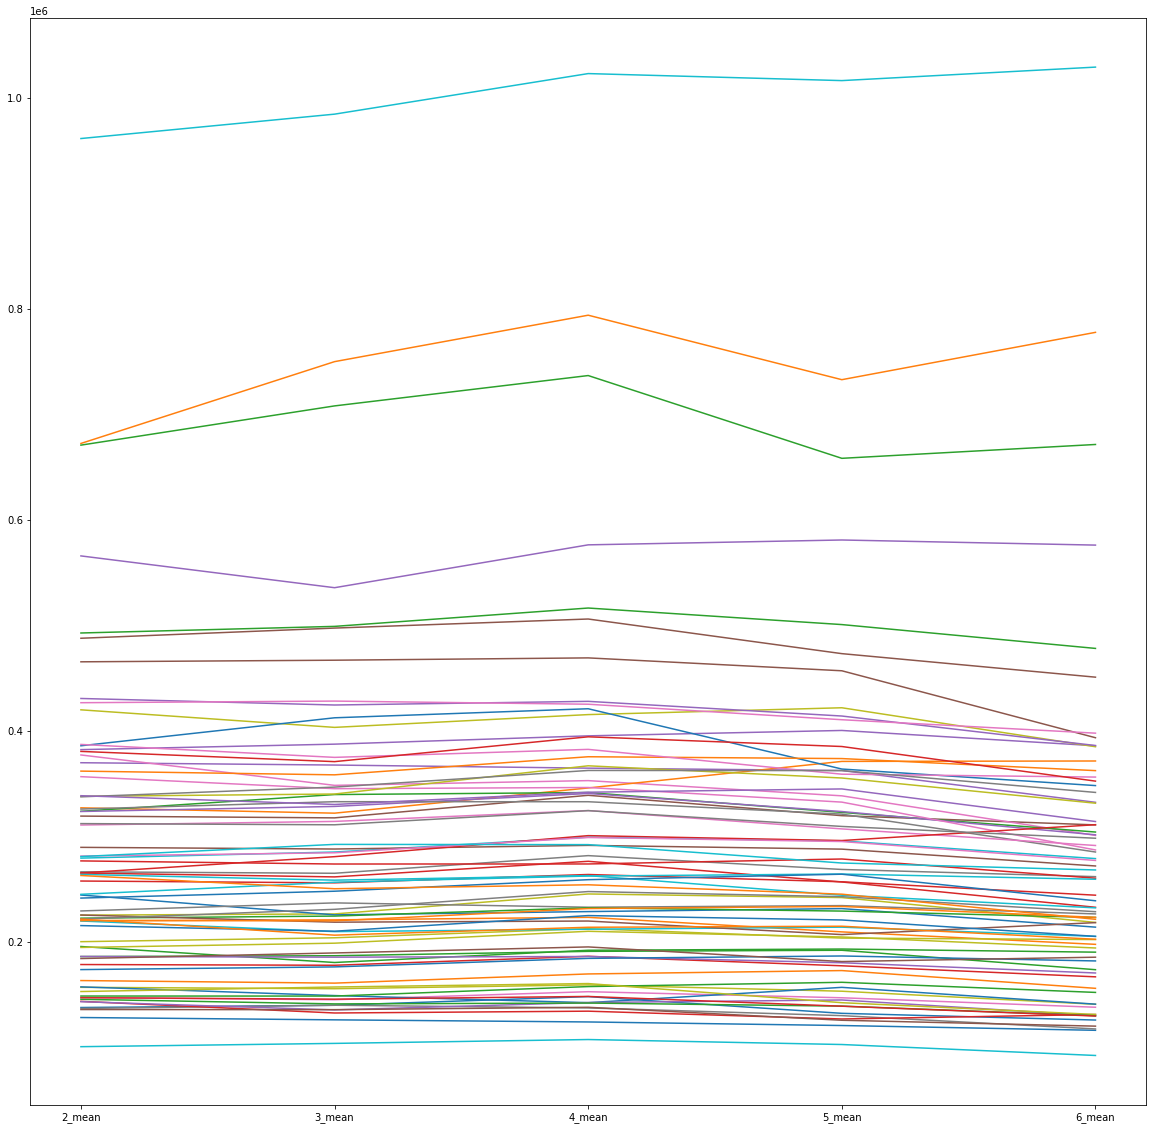

In [14]:
plt.figure(figsize=(20, 20))
plt.plot(svod[['2_mean', '3_mean', '4_mean', '5_mean', '6_mean' ]].T)
plt.show()

In [15]:
svod_shop['start_2'] = 0
svod_shop['прирост_сред_3'] = (svod_shop['3_mean'] - svod_shop['2_mean']) / svod_shop['2_mean'] * 100
svod_shop['прирост_сред_4'] = (svod_shop['4_mean'] - svod_shop['3_mean']) / svod_shop['3_mean'] * 100
svod_shop['прирост_сред_5'] = (svod_shop['5_mean'] - svod_shop['4_mean']) / svod_shop['4_mean'] * 100
svod_shop['прирост_сред_6'] = (svod_shop['6_mean'] - svod_shop['5_mean']) / svod_shop['5_mean'] * 100

In [16]:
svod_shop

,adress,Shirota,Dolgota,ploshad,Район,shtat,qty_kassa,qty_kassa_so,format,2_sum,...,5_mean,5_std,6_sum,6_mean,6_std,start_2,прирост_сред_3,прирост_сред_4,прирост_сред_5,прирост_сред_6
14966,"Москва Октябрьская, дом № 89",55.80,37.61,113.60,Марьина Роща,3,5,3,ВкусВилл,7450201.32,...,268324.36,50076.31,7060635.32,261505.01,49192.43,0,-0.51,6.32,-4.66,-2.54
11912,"Москва ул. Летчика Бабушкина, д. 11/2, корп. 1",55.86,37.67,101.00,Бабушкинский,3,4,2,ВкусВилл,5200714.74,...,191715.98,21310.34,4678944.34,173294.23,20408.58,0,0.42,2.22,0.55,-9.61
11271,"Москва ул. Менжинского, 23",55.87,37.66,188.50,Бабушкинский,5,8,3,ВкусВилл,12052622.99,...,413806.38,54922.84,10418008.07,385852.15,47397.64,0,-1.44,0.82,-3.25,-6.76
12296,"Москва ул. Лескова, д. 19А, стр. 2",55.89,37.62,106.30,Бибирево,2,3,1,Шмель,2808088.10,...,102345.24,12641.33,2482659.75,91950.36,11932.56,0,3.10,3.55,-4.41,-10.16
12612,"Москва ул. Березовая аллея, д. 17, к. 1",55.85,37.62,186.30,Останкинский,7,5,2,ВкусВилл,15837583.48,...,580722.61,56380.69,15548678.21,575876.97,36854.17,0,-5.33,7.59,0.80,-0.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11956,"Москва ул. Абрамцевская, д. 24а",55.90,37.57,115.90,Лианозово,4,5,3,ВкусВилл,9116491.02,...,320790.90,36118.83,7691419.32,284867.38,34613.24,0,2.15,-0.01,-3.54,-11.20
11512,Москва ул. Лескова 2,55.90,37.59,206.00,Бибирево,5,5,2,ВкусВилл,13791154.16,...,500521.40,69019.74,12903882.82,477921.59,52474.57,0,1.27,3.49,-3.04,-4.52
11701,"Москва ул.Полярная, д.10 стр 1",55.87,37.64,136.70,Медведково Южное,4,8,3,ВкусВилл,10647404.47,...,384910.45,49530.43,9506264.85,352083.88,36037.15,0,-2.55,6.35,-2.33,-8.53
11457,"Москва Алтуфьевское ш., д. 93",55.90,37.59,82.00,Лианозово,2,3,1,Шмель,4272262.67,...,141998.44,31355.41,3533320.00,130863.70,31345.57,0,2.81,2.08,-11.33,-7.84


In [17]:
# Добавим конкурентов
other_shops = pd.read_csv(path+'конкуренты.csv', sep=';')

In [18]:
svod_shop = pd.concat([other_shops.set_index('id_tt_cl'), svod_shop], axis=1)

In [19]:
# Добавим плотность населения вокруге 200 м
population = pd.read_csv(path+'Плотность населения.csv', sep=';').drop('adress', axis=1)

In [20]:
svod_shop = pd.concat([population.set_index('id_tt'), svod_shop], axis=1)

In [22]:
svod_shop

,population,count_shops,shop_list,adress,Shirota,Dolgota,ploshad,Район,shtat,qty_kassa,...,5_mean,5_std,6_sum,6_mean,6_std,start_2,прирост_сред_3,прирост_сред_4,прирост_сред_5,прирост_сред_6
10864,3100.00,7.00,"Eurospar,Дикси,Азбука вкуса,Азбука daily,ВкусВ...","Москва проспект Мира, д. 116",55.81,37.64,113.40,Алексеевский,4,6,...,363548.37,84176.01,9392144.77,347857.21,73270.76,0,6.88,2.08,-13.59,-4.32
11127,2418.00,4.00,"Перекрёсток,Перекрёсток,Продуктовый магазин,Фе...","Москва ул. Пришвина, д. 26",55.88,37.60,105.80,Бибирево,4,5,...,274435.44,33040.23,7232107.73,267855.84,33553.55,0,4.12,-0.08,-5.97,-2.40
11128,5332.00,9.00,"Супер Лента,Перекрёсток,Пятёрочка,Перекрёсток,...","Москва ул. Широкая, д. 12",55.89,37.66,127.70,Медведково Северное,5,6,...,319327.13,52918.08,8385541.39,310575.61,44590.27,0,-0.52,6.74,-5.70,-2.74
11160,4712.00,5.00,"Перекрёсток,Пятёрочка,Пятёрочка,Продуктовый ма...","Москва Ярославское шоссе, д. 2, корп. 2",55.85,37.68,142.10,Ярославский,4,5,...,309121.44,43595.77,8044286.09,297936.52,42347.81,0,-0.36,4.31,-4.62,-3.62
11178,4402.00,5.00,"Перекрёсток,Пятёрочка,Авокадо,Первым делом,Ори...",Москва ул. Снежная 21,55.85,37.65,124.10,Свиблово,5,6,...,410304.81,63670.52,10734064.44,397557.94,55390.64,0,0.36,-0.69,-3.46,-3.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11846,2449.00,NaN,NaN,"Москва ул. Руставели, д. 6 к. 6",55.81,37.59,138.70,Бутырский,3,5,...,181001.08,30196.87,4998632.96,185134.55,26576.07,0,2.89,3.03,-7.12,2.28
12348,3007.00,NaN,NaN,"Москва ул. Тайнинская, д. 16, к. 1",55.88,37.68,94.60,Лосиноостровский,2,4,...,161338.61,17868.09,4097123.24,151745.31,13679.32,0,-0.02,6.07,2.58,-5.95
14125,2170.00,NaN,NaN,"Москва ул. Сухонская, д. 15 стр. 2",55.88,37.66,108.00,Медведково Северное,2,3,...,144568.77,16987.43,3500826.27,129660.23,12258.33,0,-5.47,5.17,1.71,-10.31
12468,4929.00,NaN,NaN,"Москва ул. Космонавтов, д. 12",55.82,37.65,106.00,Алексеевский,2,4,...,146666.80,18102.66,3717389.99,137681.11,14152.71,0,-1.38,5.26,-3.78,-6.13


In [21]:
svod_shop.to_csv(path_2022+'svod_shop.csv', sep=';')